# Project 5

## Assignment Scenario

You are a data scientist in an e-commerce company. You are given a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. This dataset contains the following columns:

- Clothing ID

- Age

- Title

- Review Text

- Rating

- Recommended IND

- Positive Feedback Count

- Division Name

- Department Name

- Class Name


You are asked to perform text classification by using the attached Jupyter Notebook and writing a script in Python, and run all the cells. You only need to submit a Jupyter Notebook.


**Steps and Questions**

1. Load the data, Women's Clothing E-Commerce Reviews.csv Download Women's Clothing E-Commerce Reviews.csv, into memory.
2. Please concatenate the Title, Review Text, Division Name, Department Name, and Class Name as a new feature of Reviews.
3. Please clean the new feature of Reviews using regular expressions.
4. Build an RNN model to forecast the Recommended IND based on Reviews using TensorFlow.
5. Evaluate the model and check the model fit. Do you recommend this model? Please justify your answer.


## Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display configuration for plots
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-1-153b59d97dd5>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Step 1: Load the Dataset

In [2]:
file_path = '/Users/matthewmoore/Downloads/Womens Clothing E-Commerce Reviews.csv'

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Drop unnecessary columns

df = df.drop(columns = ['Unnamed: 0'], errors = 'ignore')

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Step 2: Concatenate Title, Review Text, Division Name, Department Name, and Class Name into a new field, "Reviews"

In [4]:
df['Reviews'] = df[['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']].fillna('').agg(' '.join, axis = 1)

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [5]:
df[['Reviews', 'Recommended IND', 'Rating']].head(10)

,Reviews,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and com...,1,4
1,Love this dress! it's sooo pretty. i happen...,1,5
2,Some major design flaws I had such high hopes ...,0,3
3,"My favorite buy! I love, love, love this jumps...",1,5
4,Flattering shirt This shirt is very flattering...,1,5
5,Not for the very petite I love tracy reese dre...,0,2
6,Cagrcoal shimmer fun I aded this in my basket ...,1,5
7,"Shimmer, surprisingly goes with lots I ordered...",1,4
8,Flattering I love this dress. i usually get an...,1,5
9,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",1,5


### Step 3:  Clean the New Feature, Reviews, Using Regular Expressions

In [6]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces from the text
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove all non-alphabetic characters in the text
    text = text.lower().strip()  # Convert all words to lowercase 
    return text

df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)


df[['Cleaned_Reviews', 'Recommended IND', 'Rating']].head()

,Cleaned_Reviews,Recommended IND,Rating
0,absolutely wonderful silky and sexy and comfo...,1,4
1,love this dress its sooo pretty i happened to ...,1,5
2,some major design flaws i had such high hopes ...,0,3
3,my favorite buy i love love love this jumpsuit...,1,5
4,flattering shirt this shirt is very flattering...,1,5


### Step 4: Build an RNN model to forecast the Recommended IND based on Reviews using TensorFlow.

In [7]:
# Prepare the text data for RNN Model

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
import numpy as np

# Extract features (Cleaned_Reviews) and target (Recommended_IND)
X = df['Cleaned_Reviews'].values
y = df['Recommended IND'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set up TextVectorization
VOCAB_SIZE = 10000
MAX_LEN = 200

# Initialize the TextVectorization layer
vectorizer = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LEN)
vectorizer.adapt(X_train)

# Transform text into numerical sequences
X_train = vectorizer(np.array(X_train)).numpy()
X_test = vectorizer(np.array(X_test)).numpy()

In [8]:
# Build the RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 200, 256)          263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
588/588 [==============================] - 165s 273ms/step - loss: 0.2987 - accuracy: 0.8716 - val_loss: 0.2558 - val_accuracy: 0.8887
Epoch 2/10
588/588 [==============================] - 151s 256ms/step - loss: 0.2078 - accuracy: 0.9136 - val_loss: 0.2304 - val_accuracy: 0.9049
Epoch 3/10
588/588 [==============================] - 1020s 2s/step - loss: 0.1656 - accuracy: 0.9338 - val_loss: 0.2290 - val_accuracy: 0.9051
Epoch 4/10
588/588 [==============================] - 156s 265ms/step - loss: 0.1414 - accuracy: 0.9462 - val_loss: 0.2341 - val_accuracy: 0.8951
Epoch 5/10
588/588 [==============================] - 147s 249ms/step - loss: 0.1197 - accuracy: 0.9568 - val_loss: 0.2717 - val_accuracy: 0.9055
Epoch 6/10
588/588 [==============================] - 150s 255ms/step - loss: 0.1236 - accuracy: 0.9536 - val_loss: 0.2558 - val_accuracy: 0.9046
Epoch 7/10
588/588 [==============================] - 153s 260ms/step - loss: 0.0909 - accuracy: 0.9699 - val_loss: 0.2881 - v

147/147 [==============================] - 14s 95ms/step - loss: 0.3672 - accuracy: 0.8972
Test Accuracy: 0.90


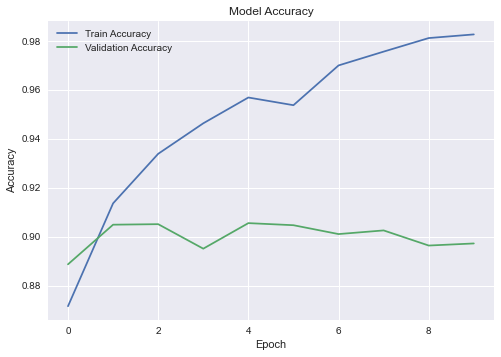

In [10]:
import matplotlib.pyplot as plt

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
if test_accuracy > 0.85:
    print("The RNN model performs well and is recommended for deployment.")
else:
    print("The RNN model accuracy is below the acceptable threshold. Consider using a different architecture or improving the data preprocessing.")

The RNN model performs well and is recommended for deployment.


### Results:

The output from the cell above shows that we designated a threshold of 85% as an acceptable criteria for whether we would deploy the model. This model was able to show a test accuracy of 90%, so we will recommend to deploy. However, this was not the result of the first attempt. Our initial model underperformed on both the training and test. As a result, I decided to research different methods of how to improve the model's performance. I came across the bidirectional lstm, which processes data in both directions,forward and backwards. I read that this is an enhancement technique to improve the model's long term short term memory. This method especially works well with text data. 